<a href="https://colab.research.google.com/github/nreddyabhinav/ML/blob/master/Python_Notebooks/MultiVariateLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount the drive First
(If loading data from google drive)

In [3]:
from google.colab import drive

drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#Program Starts Here

**Import Libraries : **

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm


**Prepare data : **

In [0]:
def fs(data):
  for j in range(0,3):
    mean = np.mean(data[:,j])
    std = np.std(data[:,j])
    for i in range(0,m):
      datafs[i,j] = (data[i,j]-mean)/std
  return datafs

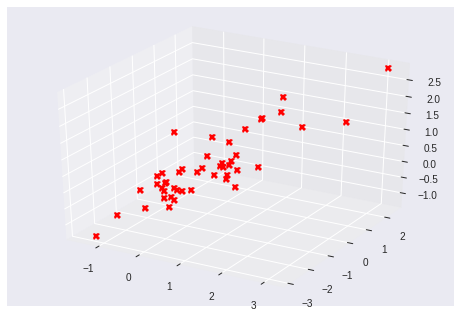

In [77]:
data = pd.read_csv("drive/My Drive/ColabNo/ex1data2.txt",header=None)
data = data.values
m = len(data)
datafs = np.ndarray((m,3))
dat = fs(data)

x = np.concatenate((np.ones((m,1)),dat[:,0:2]),axis=1)
y = dat[:,2]
x = np.around(x,decimals=4)
np.around(y,decimals=4)
theta = np.zeros((3,1)) #np.array([[0.],[0.],[0.]],dtype=np.float)
a = 0.01
iterations = 400
jh = np.zeros((iterations,1))

fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.plot(x[:,1],x[:,2],y,'rX')

**Feature Scaling : **

(Mean Normalization)

**Cost Function : **

In [0]:
def cost(x,y,theta):
  return (np.sum((np.matmul(np.transpose(theta),np.transpose(x))-y)**2)/(2*m))
  

In [46]:
print(cost(x,y,theta))

0.5


**Gradient Descent : **

In [0]:
def grad(x, y, theta, a, itera):
  temp = theta
  for i in range(0, itera):
    for j in range(0, 3):
      gd = (np.sum((np.matmul(np.transpose(theta),np.transpose(x))-y)*np.transpose(x)[j,:])*a/m)
      temp[j,0] = temp[j,0] - gd 
    theta = temp
    jh[i] = cost(x, y, theta)
  print(jh[-10:,:])

In [79]:
grad(x, y, theta, a, iterations)
print(theta)

[[0.13361772]
 [0.13361695]
 [0.13361618]
 [0.13361542]
 [0.13361466]
 [0.13361392]
 [0.13361317]
 [0.13361244]
 [0.13361171]
 [0.13361099]]
[[-1.87468479e-07]
 [ 8.71154628e-01]
 [-3.96003249e-02]]


# Testing

In [20]:
for i in range(0,3):
  print(np.max(data[:,i]))
  print(np.min(data[:,i]))
  print(np.mean(data[:,i]))
  print(np.std(data[:,i],dtype=float))
print(data)

4478
852
2000.6808510638298
786.2026187430467
5
1
3.1702127659574466
0.7528428090618781
699900
169900
340412.6595744681
123702.5360061474
[[  2104      3 399900]
 [  1600      3 329900]
 [  2400      3 369000]
 [  1416      2 232000]
 [  3000      4 539900]
 [  1985      4 299900]
 [  1534      3 314900]
 [  1427      3 198999]
 [  1380      3 212000]
 [  1494      3 242500]
 [  1940      4 239999]
 [  2000      3 347000]
 [  1890      3 329999]
 [  4478      5 699900]
 [  1268      3 259900]
 [  2300      4 449900]
 [  1320      2 299900]
 [  1236      3 199900]
 [  2609      4 499998]
 [  3031      4 599000]
 [  1767      3 252900]
 [  1888      2 255000]
 [  1604      3 242900]
 [  1962      4 259900]
 [  3890      3 573900]
 [  1100      3 249900]
 [  1458      3 464500]
 [  2526      3 469000]
 [  2200      3 475000]
 [  2637      3 299900]
 [  1839      2 349900]
 [  1000      1 169900]
 [  2040      4 314900]
 [  3137      3 579900]
 [  1811      4 285900]
 [  1437      3 249900